In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
import seaborn as sns

In [3]:
df1=pd.read_csv(r'C:\Users\Adit\Desktop\datasets\Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
area_type_count=df1['area_type'].value_counts()
print(area_type_count)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


In [6]:
df2=df1.drop(['area_type','society','balcony','availability'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [9]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

first i dropped some columns to simplify the process, then saw how many null values are present in the data set , since they arent too many as compared to the size of the data set , i decided to drop them , now i will deal with size , as it is not numeric and some are shown as bedrooms and some are shown as bhk

In [10]:
df3['size'].unique()   #shows all unique values of the particular column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

now i will create a new column called bhk which will have numeric value for number of rooms

In [11]:
df3['bhk']=df3['size'].apply(lambda x:int( x.split(' ')[0]))

C:\Users\Adit\AppData\Local\Temp\ipykernel_18976\1466528402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int( x.split(' ')[0]))


In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


we create a new column by applying a lambda function to the entries in size column

x.split(' ')  splits each value into two tokens where ' ' is the separator, now the first half of it will contain the number of rooms hence we take [0] to select the first part , but this is a string so then we also type cast it to an integer

apply()   is a panda function that applies any function passed in it to the values in the column

In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

here there are some sqft values that are given as a range and not as a float value, we can replace these with the average value of their range

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True 


In [21]:
df_notfloat=df3[~df3['total_sqft'].apply(is_float)]    #returns a dataframe where the values of sqft are not float

In [22]:
df_notfloat

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


there are 190 such values , now we need to extract the upper and lower range and then average them and replace sqft value with this 

In [26]:
df_notfloat.head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


in this there are some values in range , some are given in acres,sq meter , perch and sq yards

now whenever we get a range we will take average but in cases where different area metrics are given we will ignore those rows

i will create a function that will return float if value is float and will return average if its range string else i will return none and that row will be ignored 

In [28]:
def convert_sqft(x):
    tokens =x.split('-')
    
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    
    try:
        return float(x)
    
    except:
        return None

In [32]:
convert_sqft('1300-1400')

1350.0

In [33]:
df4=df3.copy()

In [34]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft)

In [36]:
df4.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [37]:
df4['total_sqft'].info()

<class 'pandas.core.series.Series'>
Index: 13246 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
13200 non-null  float64
dtypes: float64(1)
memory usage: 207.0 KB


now we can see all the sqft values present are in float , there are 13200 entries left

In [38]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']

In [39]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [42]:
len(df4['location'].unique())

1304

there are 1304 unique locations in the dataset, usually we would convert to numerical data by one hot encoding but there are too many locations for this , now i will see how many rows each uniwue location has , and locations that have very few entries can be grouped together as 'other'



This line is performing the following operations:

    df4.groupby('location'): This part of the code groups the DataFrame df4 by the 'location' column. It essentially creates separate groups for each unique location in the 'location' column. This is the first step in preparing the data for counting the number of entries for each location.

    ['location']: After grouping by 'location', this part of the code specifies that we want to access the 'location' column within each group.

    .agg('count'): The .agg() method is used to apply an aggregation function to each group. In this case, we are using the 'count' aggregation function to count the number of entries in each group (i.e., the number of times each location appears in the dataset).

In [45]:
df4['location'].apply(lambda x: x.strip())  #removes blank spaces
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

any location with less than 10 datapoints will grouped together now

In [49]:
len(location_stats[location_stats<10])

1051

In [50]:
location_stats_less_than_10=(location_stats[location_stats<10])

In [51]:
df4['location']=df4['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [53]:
len(df4['location'].unique())

254

In [54]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


now i will try to find and handle outlier datapoints

i will find sqft per bedroom that are too low  and remove them from the dataset

for example 600 sqft 6 bedrooms , this seems too low and maybe an error

In [63]:
df4[df4['total_sqft']/df4['bhk']<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


here in the second entry we can see the sqft is 60 but there are 8 rooms , this is an outlier or anomaly

there are 744 such cases where the area per bedroom is less than 300

In [58]:
df4.shape

(13246, 7)

In [62]:
df4[df4['total_sqft']/df4['bhk']<300].shape

(744, 7)

In [64]:
df5=df4[~(df4['total_sqft']/df4['bhk']<300)]  #new df where outlier cases are negated 

In [65]:
df5.shape

(12502, 7)

In [84]:
df5=df5.drop(['size'],axis=1)

In [85]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

although very high price per area is realistic and possible , since i am building a generic model it is better to remove such extreme cases, for example where price per sqft is 176470

i will remove values of price that lie outside 1 standard deviation of the mean

In [86]:
def price_outlier(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby(['location']):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf['price_per_sqft']<(m+std)) & (subdf['price_per_sqft']>(m-std))]
        df_output=pd.concat([df_output,reduced_df],ignore_index=True)
    return df_output    
    

In [87]:
df6 = price_outlier(df5)
df6.shape

(10226, 6)

next i will see the bathroom attribute and find outliers in that , generally bathrooms are around the number of bhk , if there are many more bathrooms than rooms in the house then maybe something is wrong 

In [89]:
df6['bath'].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [90]:
df6[df6['bath']>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
597,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
5338,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8537,other,12000.0,12.0,525.0,10,4375.000000
8623,other,10000.0,16.0,550.0,16,5500.000000
9327,other,6000.0,12.0,150.0,11,2500.000000
9643,other,5425.0,13.0,275.0,13,5069.124424


In [93]:
df6[df6['bath']>(df6['bhk']+1)]

,location,total_sqft,bath,price,bhk,price_per_sqft
54,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6,15033.333333
55,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6,18750.000000
547,Arekere,2710.0,6.0,142.0,4,5239.852399
597,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
600,BTM 2nd Stage,1260.0,5.0,185.0,3,14682.539683
...,...,...,...,...,...,...
9708,other,1200.0,4.0,138.0,2,11500.000000
9908,other,6652.0,6.0,510.0,4,7666.867108
10024,other,600.0,4.0,70.0,2,11666.666667
10188,other,6652.0,6.0,660.0,4,9921.828022


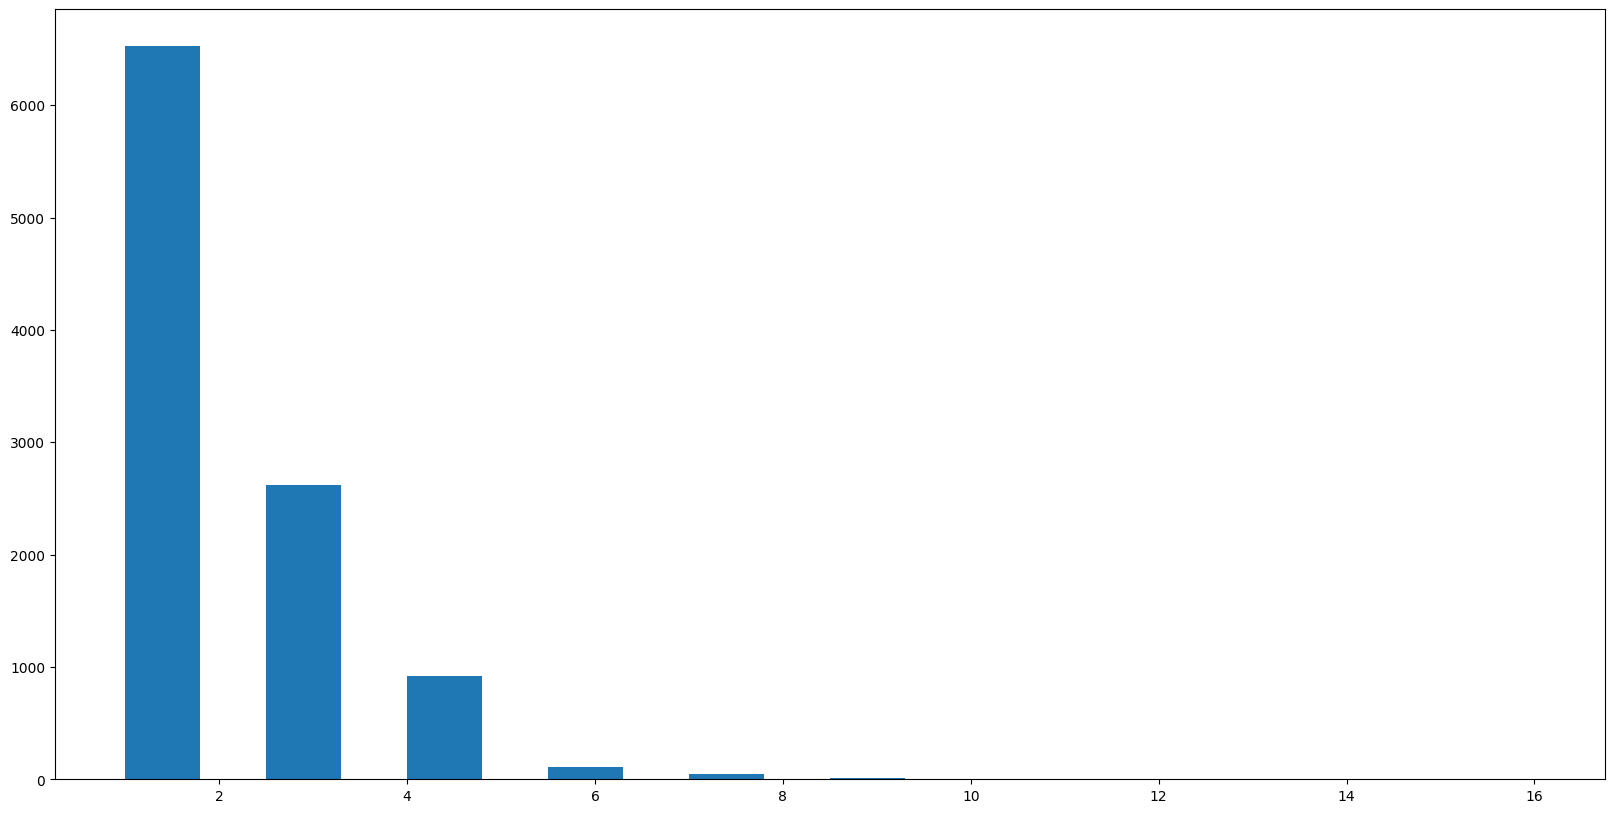

In [98]:
plt.hist(df6.bath,width=0.8)
plt.xlabel='bathrooms'
plt.ylabel='count'
plt.show()

In [127]:
df7=df6[df6['bath']<=(df6['bhk']+1)]

In [128]:
df7.shape

(10132, 6)

now we will convert location from categorical to numeric using one hot encoding 

In [129]:
dummies=pd.get_dummies(df7['location'],dtype=int)

In [130]:
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df7=pd.concat([df7,dummies.drop('other',axis=1)],axis=1)
df7.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,44.0,3,3520.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we drop one of the dummy columns because it can be represented by all the other columns being zero, there is no need for it 

ie if there are n unique values of attributes that we are encoding , we do not need n new columns but just n-1

this prevents multi collinearity

In [134]:
df7=df7.drop('location',axis=1)
df7.head()

,total_sqft,bath,price,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,44.0,3,3520.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,40.0,2,3200.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,6916.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,3418.803419,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,4561.403509,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
X=df7.drop(['price','price_per_sqft'],axis=1)
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
y=df7.price

In [157]:
y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [158]:
y.describe()

count    10132.000000
mean        89.581833
std         83.845110
min         10.000000
25%         48.767500
50%         66.490000
75%         99.000000
max       2200.000000
Name: price, dtype: float64

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [178]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [179]:
lr_model.score(X_test,y_test)

0.8509186899788316

now i will use k cross validation to try and improve my accuracy

In [182]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=4,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.80590197, 0.80280733, 0.77100882, 0.82250681])

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
#                 'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)    

,model,best_score,best_params
0,linear_regression,0.800556,{}
1,lasso,0.637782,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.707931,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


linear regression seems to give the best accuracy

function to predict prices 

In [226]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]
    location = location.strip()
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

loc_index looks through the columns of X till it finds the location we pass to the function

then x is created , a numpy array with as many number of 0s as columns in the orignal df]

the first 3 features are assigned their respective values and the value at location index is assigned 1 to indicate location in the columns we got after one hot encoding 

then it returns the predicted house price 

In [203]:
np.where(X.columns=='Vijayanagar')

#np.where(X.columns=='....') returns a tuple whos first element is an array that contains all indices of X.columns where the 
#value at the given index is equal to whatever we pass in it , hence we use the first [0] to select the array

#the second element is the datatype of index 



(array([246], dtype=int64),)

In [204]:
np.where(X.columns=='Vijayanagar')[0][0]

246

then from the array present in the tuple we use another [0] to retrieve the first element in the array 

in this code since all locations in X.columns are unique only one element will be present in the array and that will be at index [0] , hence using [0][0] gets the index of location



so the predict_price function creates an array and fills it with the info we input which then is passed to the model we created earlier that predicts and returns house price 

    lr_clf.predict([x]): This part of the code uses the trained linear regression model lr_clf to make a prediction. Specifically:
        lr_clf.predict([x]): It calls the predict method of the linear regression model lr_clf and provides a single input sample, which is represented as a list [x]. The input sample x is a feature vector that contains values for the input features such as square footage (sqft), number of bathrooms (bath), number of bedrooms (bhk), and one-hot encoded location information.
    [0]: After making the prediction, the result is an array of predicted values. Since you're making a prediction for a single input sample, this array typically contains just one prediction. To extract that prediction from the array and return it as a single value, [0] is used to access the first (and in this case, the only) element of the prediction array.

In [235]:
predict_price('Indira Nagar',8000,6,8)

C:\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


680.8302038801287

the warning is because the model was trained with a dataframe with headers , and ton predict i am passing an array with just values 

it wont create any issue in actual prediction


In [238]:
import pickle 

with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_model,f)

i stored the model in a pickle file , but now i also need to store the column info, since thats crucial for indexing , i will store that in a json file

In [239]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))